# Problem 2

In [36]:
using XLSX
using DataFrames
using LinearAlgebra
using Statistics

In [37]:
dataframe = DataFrame(XLSX.readtable("Problem 2 Chart.xlsx", "Sheet1")...);

In [38]:
fault_id = dataframe[1:end, 1];
segment_origin_easting = dataframe[1:end,2]
segment_origin_northing = dataframe[1:end, 3]
segment_end_easting = dataframe[1:end, 4]
segment_end_northing = dataframe[1:end, 5]
average_depth = dataframe[1:end, 6]
dip = dataframe[1:end, 7]
dip_direction = dataframe[1:end, 8];

In [39]:
number_of_rows = size(dip_direction)[1];

# Problem 2.1

In [40]:
pore_pressure_gradient = 0.44
minimum_horizontal_stress_gradient = 0.76
maximum_horizontal_stress_gradient = 0.79
vertical_stress_gradient = 1
pore_pressure = pore_pressure_gradient.*average_depth;
minimum_horizontal_stress = minimum_horizontal_stress_gradient.*average_depth;
maximum_horizontal_stress = maximum_horizontal_stress_gradient.*average_depth;
vertical_stress = vertical_stress_gradient.*average_depth;

In [41]:
intermediate_stress_matrix = zeros(size(dip)[1],3);
intermediate_stress_matrix[1:end, 1] = vertical_stress
intermediate_stress_matrix[1:end, 2] = maximum_horizontal_stress
intermediate_stress_matrix[1:end, 3] = minimum_horizontal_stress;

In [42]:
intermediate_effective_stress_matrix = intermediate_stress_matrix .- pore_pressure;

In [43]:
for i in 1:size(dip)[1]
    
    println(fault_id[i])
    println("Stress Tensor")
   
    println(Diagonal(intermediate_stress_matrix[i, 1:end]))
    
    println("Effective Stress Tensor")
    
    println(Diagonal(intermediate_effective_stress_matrix[i, 1:end]))
    println("\n")
end

F1a
Stress Tensor
[7250.0 0.0 0.0; 0.0 5727.5 0.0; 0.0 0.0 5510.0]
Effective Stress Tensor
[4060.0 0.0 0.0; 0.0 2537.5 0.0; 0.0 0.0 2320.0]


F1b
Stress Tensor
[7150.0 0.0 0.0; 0.0 5648.5 0.0; 0.0 0.0 5434.0]
Effective Stress Tensor
[4004.0 0.0 0.0; 0.0 2502.5 0.0; 0.0 0.0 2288.0]


F1c
Stress Tensor
[7050.0 0.0 0.0; 0.0 5569.5 0.0; 0.0 0.0 5358.0]
Effective Stress Tensor
[3948.0 0.0 0.0; 0.0 2467.5 0.0; 0.0 0.0 2256.0]


F1d
Stress Tensor
[7300.0 0.0 0.0; 0.0 5767.0 0.0; 0.0 0.0 5548.0]
Effective Stress Tensor
[4088.0 0.0 0.0; 0.0 2555.0 0.0; 0.0 0.0 2336.0]


F2
Stress Tensor
[7500.0 0.0 0.0; 0.0 5925.0 0.0; 0.0 0.0 5700.0]
Effective Stress Tensor
[4200.0 0.0 0.0; 0.0 2625.0 0.0; 0.0 0.0 2400.0]


F3
Stress Tensor
[7800.0 0.0 0.0; 0.0 6162.0 0.0; 0.0 0.0 5928.0]
Effective Stress Tensor
[4368.0 0.0 0.0; 0.0 2730.0 0.0; 0.0 0.0 2496.0]


F4a
Stress Tensor
[7400.0 0.0 0.0; 0.0 5846.0 0.0; 0.0 0.0 5624.0]
Effective Stress Tensor
[4144.0 0.0 0.0; 0.0 2590.0 0.0; 0.0 0.0 2368.0]


F4b
Stre

# Problem 2.2

In [44]:
function geographical_stress_tensor_function(alpha,beta,gamma,principal_stress_tensor)
    
    rotation_matrix = [cosd(alpha)*cosd(beta) sind(alpha)*cosd(beta) -sind(beta);
    (cosd(alpha)*sind(beta)*sind(gamma) - sind(alpha)*cosd(gamma)) (sind(alpha)*sind(beta)*sind(gamma) + cosd(alpha)*cosd(gamma)) (cosd(beta)*sind(gamma)); 
    (cosd(alpha)*sind(beta)*cosd(gamma) + sind(alpha)*sind(gamma)) (sind(alpha)*sind(beta)*cosd(gamma) - cosd(alpha)*sind(gamma)) (cosd(beta)*cosd(gamma))]
    
    
    geographical_stress_tensor = transpose(rotation_matrix)* principal_stress_tensor*rotation_matrix
    
    returned_geographical_vector = zeros(3)
    returned_geographical_vector[1] = geographical_stress_tensor[1,1]
    returned_geographical_vector[2] = geographical_stress_tensor[2,2]
    returned_geographical_vector[3] = geographical_stress_tensor[3,3]
    
    return returned_geographical_vector
end
    

geographical_stress_tensor_function (generic function with 1 method)

In [45]:
change_x = segment_end_easting .- segment_origin_easting
change_y = segment_end_northing .- segment_origin_northing;

In [46]:
strike = 90 .- atand.(change_y./change_x);
combined_geographical_stress_vector = zeros(number_of_rows, 3);
alpha = 0; beta = 90; gamma = 0;

In [47]:
for i in 1:number_of_rows
    
    combined_geographical_stress_vector[i, 1:end] = geographical_stress_tensor_function(alpha, beta, gamma, Diagonal(intermediate_stress_matrix[i, 1:end]))
    
end

In [13]:
function normal_stress_and_shear_stress_function(strike, dip, geographical_stress_tensor, pore_pressure)
    
 
        
    normal_vector = [-sind(strike)*sind(dip); cosd(strike)*sind(dip); -cosd(dip)]

    strike_vector = [cosd(strike); sind(strike); 0]

    dip_vector = [-sind(strike).*cosd(dip); cosd(strike)*cosd(dip); sind(dip)]
       
    stress_vector_acting_on_plane_of_the_fault = geographical_stress_tensor*normal_vector

    total_normal_stress = dot(stress_vector_acting_on_plane_of_the_fault, normal_vector)
    
    effective_normal_stress = total_normal_stress - pore_pressure
    
    shear_stress_dip = dot(stress_vector_acting_on_plane_of_the_fault, dip_vector)

    shear_stress_strike = dot(stress_vector_acting_on_plane_of_the_fault, strike_vector)

    shear_stress = sqrt((shear_stress_dip^2)+(shear_stress_strike^2))
    
    return effective_normal_stress, shear_stress
    
end

normal_stress_and_shear_stress_function (generic function with 1 method)

In [14]:
effective_normal_stress = zeros(number_of_rows)
shear_stress = zeros(number_of_rows);

In [15]:
for i in 1:number_of_rows

    effective_normal_stress[i], shear_stress[i] = normal_stress_and_shear_stress_function(strike[i], dip[i], Diagonal(combined_geographical_stress_vector[i, 1:end]), pore_pressure[i])
    
end

In [16]:
effective_vertical_stress = vertical_stress .- pore_pressure

ratio_effective_normal_stress_to_effective_vertical_stress = effective_normal_stress./effective_vertical_stress

ratio_shear_stress_to_effective_vertical_stress = shear_stress./effective_vertical_stress;



In [17]:
using Plots

In [18]:
function circleShape(x,y,r)
    
    theta = LinRange(3*pi/2, 5*pi/2, 1001)
    (x.+ r*sin.(theta)), (y .+ r*cos.(theta))
    
end

function mohrs_circle(x)
    
    center_middle = (x[1,1] + x[2,2])/2
    radius_middle = (x[1,1] - x[2,2])/2
    
    center_minor = (x[2,2] + x[3,3])/2
    radius_minor = (x[2,2] - x[3,3])/2
    
    center_major = (x[1,1] + x[3,3])/2
    radius_major = (x[1,1] - x[3,3])/2
    
    theta = LinRange(0,90,1001)
    
    
    plot(circleShape(center_middle, 0, radius_middle), label = false)
    plot!(circleShape(center_minor, 0,radius_minor), label = false)
    plot!(circleShape(center_major, 0, radius_major), label = false)
    ylabel!("Shear Stress (psi)")
    xlabel!("Effective Normal Stress (psi)")
    title!("E")
    
end

mohrs_circle (generic function with 1 method)

In [19]:
mohr_circle_plot = Diagonal(intermediate_effective_stress_matrix[1, 1:end])./intermediate_effective_stress_matrix[1, 1];

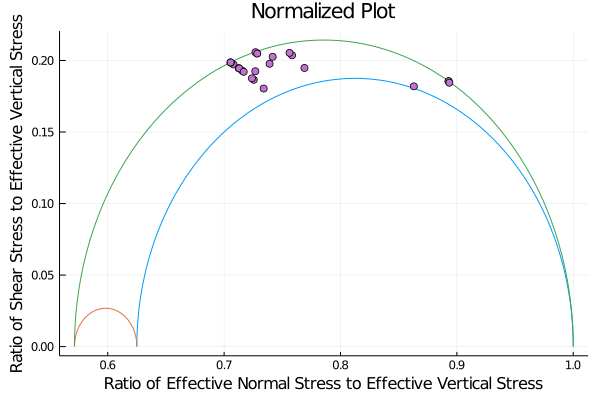

In [20]:
mohrs_circle(mohr_circle_plot)
scatter!(ratio_effective_normal_stress_to_effective_vertical_stress, ratio_shear_stress_to_effective_vertical_stress, label = false)
xlabel!("Ratio of Effective Normal Stress to Effective Vertical Stress")
ylabel!("Ratio of Shear Stress to Effective Vertical Stress")
title!( "Normalized Plot")


# Problem 2.3

In [21]:
friction_coefficient = 0.6
ratio_of_effective_normal_stress_to_effective_vertical_stress_friction_coefficient_plot = LinRange(0,1,101)
ratio_shear_stress_to_effective_vertical_stress_friction_coefficient_plot = friction_coefficient .* ratio_of_effective_normal_stress_to_effective_vertical_stress_friction_coefficient_plot;

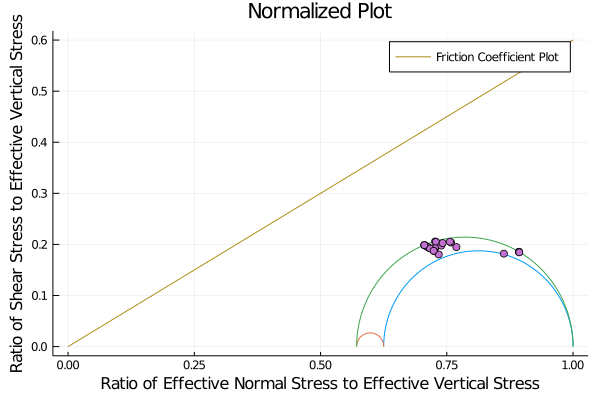

In [22]:
mohrs_circle(mohr_circle_plot)
scatter!(ratio_effective_normal_stress_to_effective_vertical_stress, ratio_shear_stress_to_effective_vertical_stress, label = false)
xlabel!("Ratio of Effective Normal Stress to Effective Vertical Stress")
ylabel!("Ratio of Shear Stress to Effective Vertical Stress")
title!( "Normalized Plot")
plot!(ratio_of_effective_normal_stress_to_effective_vertical_stress_friction_coefficient_plot, ratio_shear_stress_to_effective_vertical_stress_friction_coefficient_plot, label = "Friction Coefficient Plot")


None of the faults are prone to reactivation

# Problem 2.4

In [60]:
corresponding_fault_reactivation_values = ratio_shear_stress_to_effective_vertical_stress./friction_coefficient
mean(effective_vertical_stress)* minimum(-corresponding_fault_reactivation_values .+ ratio_effective_normal_stress_to_effective_vertical_stress)

1654.8905470562083

The maximum allowable pressure increase is about 1650 psi. 

# Problem 2.5

In [34]:
easting = hcat(segment_origin_easting, segment_end_easting)
northing = hcat(segment_origin_northing, segment_end_northing)
ratio_shear_stress_to_effective_normal_stress = shear_stress ./ effective_normal_stress;

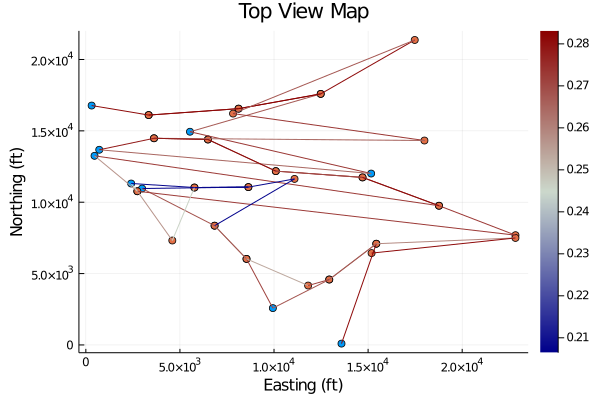

In [35]:
scatter(easting, northing, label = false)
plot!(easting, northing, color = :bluesreds, line_z = ratio_shear_stress_to_effective_normal_stress, label = false)
xlabel!("Easting (ft)")
ylabel!("Northing (ft)")
title!("Top View Map")

Faults that are closer to a shade of red are more prone to fault reactivation than the lines that are closer to a shade of blue. 